# Aim of the analysis is to classsify Suicides in India 

We will analyse the different causes for suicides based on their different education status, professional satus, social status, gender, age and the means they have adopted.

## Suicides in India
   About 800,000 people commit suicide worldwide every year, of these 135,000 (17%) are residents of India, a nation with 17.5% of world population.

## Suicides Data Set
   The data set consist of 1300 data of year 2001 to 2005 of Males and Females of different education status, professional satus, social status and age with different causes and means adopted. 
        
       



## Attribute Information :

#### 1.Causes 
##### The Causes are :
  Illness (Aids/STD),Bankruptcy or Sudden change in Economic,Cancellation/Non-Settlement of Marriage,Physical Abuse (Rape/Incest Etc.),Dowry Dispute,Ideo,Fall in Social Reputationlogical Causes/Hero Worshipping, Family Problems,Death of Dear Person, Poverty, Property Dispute, Unemployment, Fall in Social Reputation, Failure in Examination,Divorce.
##### 2.Education_status
##### The Education Status are:
No Education, Primary, Middle, Secondary, Hr. Secondary, Diploma, Graduate, Post Graduate
#### 3.Means adopted
###### The Means Adopted are:
By Hanging, By Consuming Other Poison, By Fire/Self Immolation, By Drowning, By Overdose of sleeping pills, By Over Alcoholism, By Machine, By Self Infliction of injury, By Jumping from (Other sites), By Jumping off Moving Vehicles/Trains, By Consuming Insecticides, By Fire-Arms
#### 4.Professional_Profile
###### The Professional Profile are:
Student, House Wife, Farming/Agriculture Activity, Unemployed, Professional Activity, Self Employed, Public Sector Undertaking, Service (Private), House Wife or Others, Service (Goverment), Others, Retired Person, Unemployement,
Student, Others (Please Specify)
#### 5. Social_Status
###### The Social Status are:
Never Married, Divorcee, Widowed, Married, Seperated, Widowed/Widower
#### 6.Gender
###### The Gender are:
 F(Female), M(Male)
#### 7.Age_group
###### The Age Group are:
 0-14, 15-29, 30-44, 45-59, 60+

In [1]:
# import all essential EDA packages in Python

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
os.getcwd()

'C:\\Users\\rahul\\Documents\\Suicide-analysis'

In [2]:
df=pd.read_csv('data.csv')  #loading data set

In [3]:
df.head(5)     # Observing the top five observations in each variable

,State/UT,Year,Causes,Education_status,Means adopted,Professional_Profile,Social_Status,Gender,Age_group,Number of suicides
0,A & N Islands,2001,Illness (Aids/STD),Primary,No,Student,Never Married,F,0-14,0
1,A & N Islands,2001,Bankruptcy or Sudden change in Economic,Primary,No,Student,Never Married,F,0-14,0
2,A & N Islands,2001,Cancellation/Non-Settlement of Marriage,Middle,No,Student,Never Married,F,0-14,0
3,A & N Islands,2001,Physical Abuse (Rape/Incest Etc.),Primary,No,Student,Never Married,F,0-14,0
4,A & N Islands,2001,Dowry Dispute,Middle,No,Student,Never Married,F,0-14,0


In [4]:
df.info() # Analysing the types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
State/UT                1300 non-null object
Year                    1300 non-null int64
Causes                  1300 non-null object
Education_status        1300 non-null object
Means adopted           1300 non-null object
Professional_Profile    1300 non-null object
Social_Status           1300 non-null object
Gender                  1300 non-null object
Age_group               1300 non-null object
Number of suicides      1300 non-null int64
dtypes: int64(2), object(8)
memory usage: 101.6+ KB


###### The data set does not contain any noise (missing vaules). So this data set is well balanced

In [5]:
df.isnull().sum()

State/UT                0
Year                    0
Causes                  0
Education_status        0
Means adopted           0
Professional_Profile    0
Social_Status           0
Gender                  0
Age_group               0
Number of suicides      0
dtype: int64

##### There are no missing values present, so we can now proceed with univariate analysis

In [6]:
df.describe()

,Year,Number of suicides
count,1300.000000,1300.000000
mean,2003.000000,0.497692
std,1.414758,1.454200
min,2001.000000,0.000000
25%,2002.000000,0.000000
50%,2003.000000,0.000000
75%,2004.000000,0.000000
max,2005.000000,13.000000


#### Total number of Suicides

In [7]:
df['Number of suicides'].sum()

647

In [8]:
#preprocessing data with F & M with 0 and 1
df["Gender_binary"]=df["Gender"].replace(to_replace="M",value=0)
df["Gender_binary"]=df["Gender_binary"].replace(to_replace="F",value=1)

In [9]:
#Two more attributes added Female_suicide & Male_suicide
df.loc[(df['Gender'] == "F") & (df['Number of suicides'] >0),"Female_suicide"]=df['Number of suicides']
df.loc[(df['Gender'] == "M") & (df['Number of suicides'] >0),"Male_suicide"]=df['Number of suicides']


In [10]:
#Filling NaN value with 0
df["Female_suicide"]=df["Female_suicide"].fillna(0)
df["Male_suicide"]=df["Male_suicide"].fillna(0)

#### Total Female Suicides

In [11]:
df["Female_suicide"].sum()

240.0

#### Total Male Suicides

In [12]:
df["Male_suicide"].sum()

407.0

In [13]:
#Preprocessing Mapping social status with number dict comprehension
x={k:v for (k,v) in zip(df['Social_Status'].unique(),[m for m in range(6)])}

In [14]:
#New feature with mapping with number
df['Social_status_number']=df['Social_Status'].map(x)

In [15]:
len(df["Causes"].unique())

29

In [50]:
#Removing 0 suicides row and forming new dataframe
df_value=df.where(df['Number of suicides']>0)
#Removing NaN
df_value=df_value.dropna()
#Main Causes of suicides
df_value["Causes"].unique()
causes_sum=[]
for i in df_value["Causes"].unique():
    causes_sum.append(df.loc[df['Causes'] == i,"Number of suicides"].sum(axis=0))

[Text(0,0,'Love Affairs'),
 Text(0,0,'Other Causes (Please Specity)'),
 Text(0,0,'Other Prolonged Illness'),
 Text(0,0,'Failure in Examination'),
 Text(0,0,'Causes Not known'),
 Text(0,0,'Family Problems'),
 Text(0,0,'Insanity/Mental Illness'),
 Text(0,0,'Death of Dear Person'),
 Text(0,0,'Unemployment'),
 Text(0,0,'Suspected/Illicit Relation'),
 Text(0,0,'Poverty'),
 Text(0,0,'Professional/Career Problem'),
 Text(0,0,'Not having Children(Barrenness/Impotency'),
 Text(0,0,'Paralysis'),
 Text(0,0,'Fall in Social Reputation'),
 Text(0,0,'Cancer'),
 Text(0,0,'Illness (Aids/STD)'),
 Text(0,0,'Ideological Causes/Hero Worshipping'),
 Text(0,0,'Cancellation/Non-Settlement of Marriage'),
 Text(0,0,'Physical Abuse (Rape/Incest Etc.)'),
 Text(0,0,'Bankruptcy or Sudden change in Economic'),
 Text(0,0,'Divorce'),
 Text(0,0,'Property Dispute')]

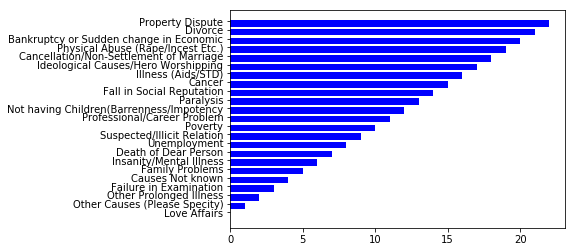

In [46]:
#fig = mp.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#ax.set_xmargin(0.1)
#ax.set_ymargin(0.01)
import numpy as np
t=[]
for i in range(len(df_value['Causes'].unique())):
    t.append(i)
#plt=mp.barh(df_value['Causes'].unique(),width=t,height=30, align='center')
fig, ax = mp.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(t))  # the x locations for the groups
ax.barh(ind, t, width, color="blue",tick_label=df_value["Causes"].unique())
ax.set_yticks(ind+width/3)
ax.set_yticklabels(df_value["Causes"].unique(), minor=False)